# PROJECT : APES

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(11)
from Settings import *
from World import *
from Agent import *
from Obstacles import *
from Foods import *
from time import time
import cv2

In [2]:
Start = time()
#Add Pictures
Settings.SetBlockSize(100)
Settings.AddImage('Wall','Pics/wall.jpg')
Settings.AddImage('Food','Pics/food.jpg')
#Specify World Size
Settings.WorldSize=(11,11)

#Create Probabilities
obs = np.zeros(Settings.WorldSize)
ragnt = np.zeros(Settings.WorldSize)
gagnt = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)
obs[3:8,5] = 1
ragnt[:,0] =1
gagnt[:,10]=1
food[:,4:7]=1
food[3:8,5] = 0

#Add Probabilities to Settings
Settings.AddProbabilityDistribution('Obs',obs)
Settings.AddProbabilityDistribution('ragnt',ragnt)
Settings.AddProbabilityDistribution('gagnt',gagnt)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs',See=True)
ragnt = Agent(Fname='Pics/ragent.jpg',Power=3,VisionAngle=360,Range=-1,PdstName='ragnt')
gagnt = Agent(Fname='Pics/gagent.jpg',VisionAngle=180,Range=1,ControlRange=0,PdstName='gagnt')
food = Foods('Food',PdstName='food')

game = World(AES=5)
#Adding Agents in Order of Following the action
game.AddAgents([ragnt,gagnt])
game.AddObstacles([obs])
game.AddFoods([food])#,Foods('Food',PdstName='food')])
Start = time()-Start
print Start

0.0953650474548


In [3]:
print np.array(ragnt.VisionFields['E'],dtype=int)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


0.00206089019775


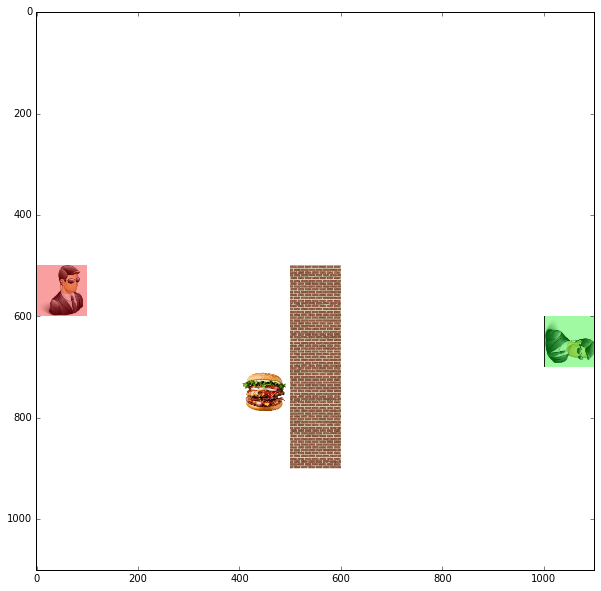

In [9]:
Start = time()
game.GenerateWorld()
Start = time()-Start
print Start
plt.figure(figsize=Settings.FigureSize)
plt.imshow(game.BuildImage())
#print game.world

observed 
[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]
mypos 
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
myori 
[0 0 1 0]
obstacles 
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
food 
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0

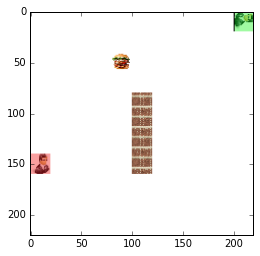

In [52]:
rimages = []
tt = []
#Framesize
fs = (Settings.WorldSize[0]*Settings.BlockSize[0],Settings.WorldSize[1]*Settings.BlockSize[1])
#cap = cv2.VideoCapture(0)
#fourcc =cv2.VideoWriter_fourcc(*'FFV1')
#out = cv2.VideoWriter('test.avi',fourcc,60, fs)
for i in range (1):
    Start = time()
    game.Step()
    gagnt.RandomAction()
    ragnt.DetectAndAstar()
    for i in ragnt.NNFeed:
        print i,'\n',np.array(ragnt.NNFeed[i],dtype=int)
    print np.array(ragnt.Flateoutput(),dtype=int)
    tt.append(time()-Start)
    #t = np.concatenate([game.AgentViewPoint(ragnt.ID),game.AgentViewPoint(gagnt.ID)],axis=1)
    #rimages.append(t)
    rimages.append(game.BuildImage())
    #out.write(cv2.cvtColor(np.array(game.BuildImage()*255,dtype=np.uint8), cv2.COLOR_RGB2BGR))
    #print ragnt.NextAction,ragnt.CurrentReward, game.StepCounter, game.Terminated
    #print 'step:',game.StepCounter
    #print gagnt.NextAction,gagnt.CurrentReward
plt.imshow(game.BuildImage())
#Save Video
#Settings.ani_frame(rimages=rimages,fps=5)
#out.release()

In [13]:
#cap.release()
cv2.imwrite('testing.jpg',cv2.cvtColor(np.array(game.BuildImage()*255,dtype=np.uint8), cv2.COLOR_RGB2BGR))

True

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(game.AgentViewPoint(1001))
plt.subplot(1,3,2)
plt.imshow(game.AgentViewPoint(1002))
plt.subplot(1,3,3)
plt.imshow(game.BuildImage())

ani_frame()